<a href="https://colab.research.google.com/github/vansika1310/OIBSIP/blob/main/Task5_OasisInfobyte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 5: Sales Prediction Using Python**



Domain: Data Science

Aim: Prediction of sales by using machine learning in python

*IMPORTING LIBRARIES*

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

*IMPORT THE DATASET*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv('/content/sample_data/advertising.csv',encoding=('ISO-8859-1'))
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


*DATA CLEANING*

In [ ]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

*Exploratory Data Analysis*

In [ ]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


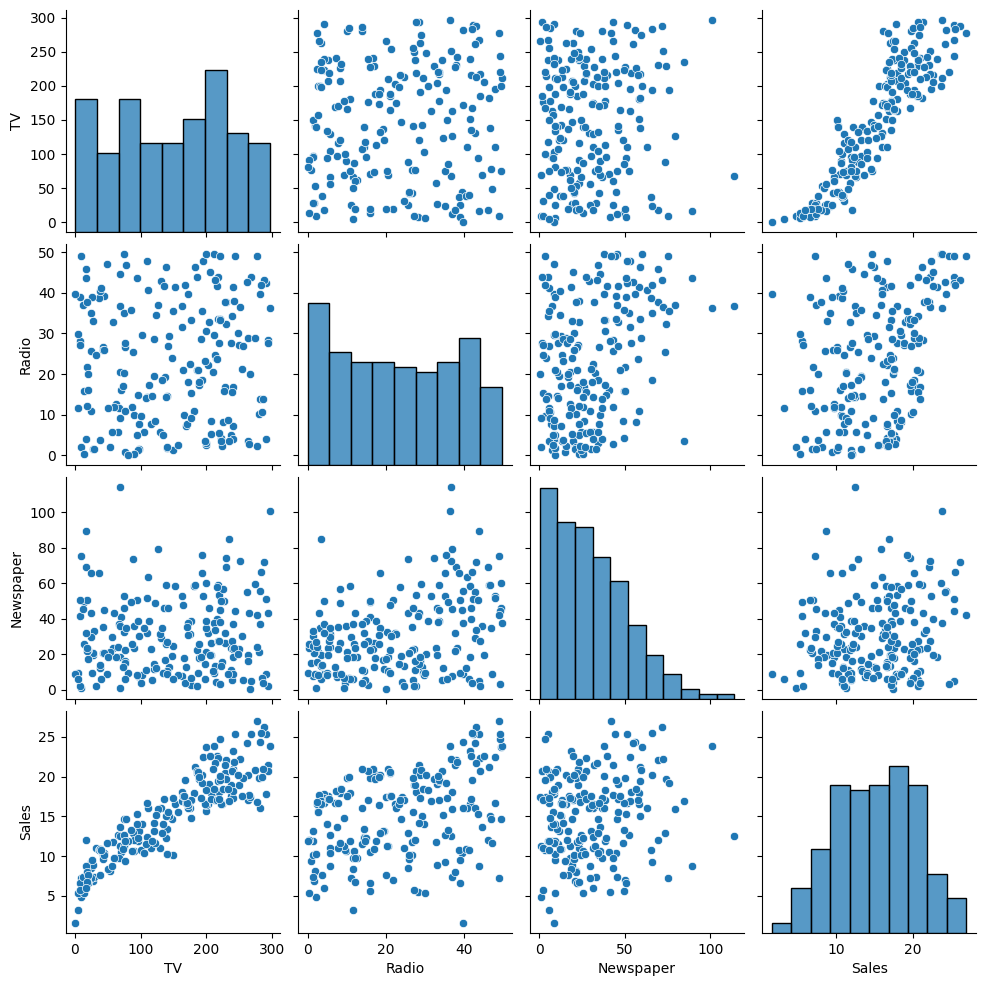

In [ ]:
sns.pairplot(data)
plt.show()

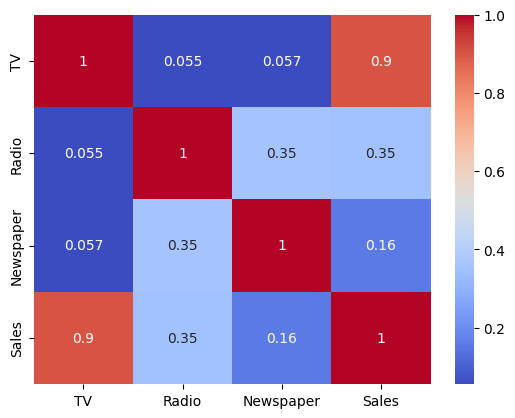

In [ ]:
correlation_matrix=data.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.show()

*CALCULATING ARROW SALES*

In [ ]:
average_sales=data['Sales'].mean()
print("Average Solution",average_sales)

Average Solution 15.130500000000001


*Histogram of Sales*

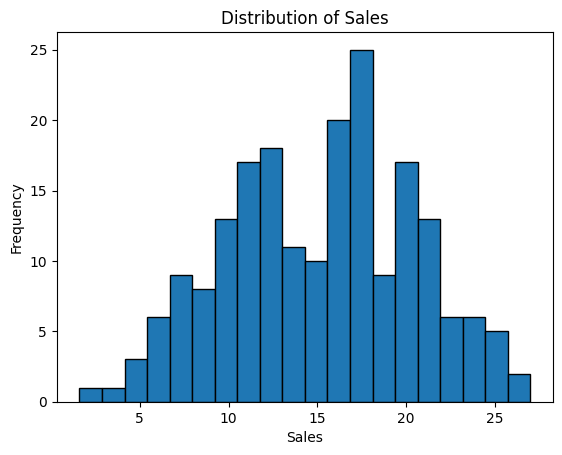

In [ ]:
plt.hist(data['Sales'],bins=20,edgecolor='k')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales')
plt.show()

*Scatterplot for Advertising Channels*

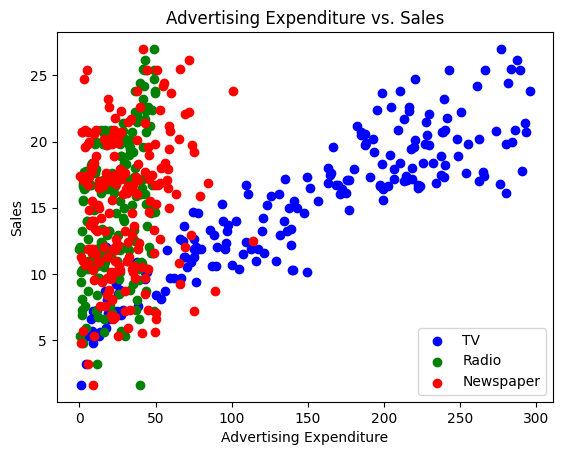

In [ ]:
plt.scatter(data['TV'],data['Sales'],c='blue',label='TV')
plt.scatter(data['Radio'],data['Sales'],c='green',label='Radio')
plt.scatter(data['Newspaper'],data['Sales'],c='red',label='Newspaper')
plt.xlabel('Advertising Expenditure')
plt.ylabel('Sales')
plt.legend()
plt.title("Advertising Expenditure vs. Sales")
plt.show()

*Box Plot for Sales*

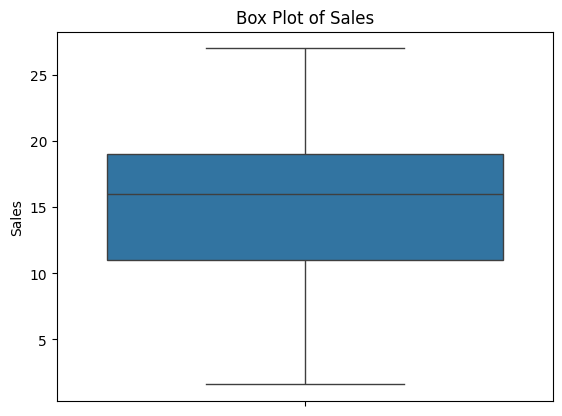

In [ ]:
sns.boxplot(y=data['Sales'])
plt.ylabel('Sales')
plt.title('Box Plot of Sales')
plt.show()

In [ ]:
# Descriptive Statistics
summary_stats=data['Sales'].describe()

print("Summary Statistics for Sales")
print(summary_stats)


Summary Statistics for Sales
count    200.000000
mean      15.130500
std        5.283892
min        1.600000
25%       11.000000
50%       16.000000
75%       19.050000
max       27.000000
Name: Sales, dtype: float64


*Feature Selection*

In [ ]:
x=data[['TV','Radio','Newspaper']]
y=data['Sales']

*Split data into Training and Testing Sets*

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

*Model Training*

In [ ]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

*Model Evaluation*

In [ ]:
y_pred=model.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("Mean Squared Error:",mse)
print("R Squared:", r2)

Mean Squared Error: 2.9077569102710896
R Squared: 0.9059011844150826


*Model Prediction*

In [ ]:
new_data=pd.DataFrame({'TV': [200], 'Radio' :[40],'Newspaper' :[20]})
predicted_sales = model.predict(new_data)
print("Predicted Sales:", predicted_sales)

Predicted Sales: [19.740528]


*Inference*

Based on the output and visualization,we can draw the following inference:

TV advertising expenditurehas a strong positive correlation with sales.Radio Advertising expenditure also has a positive correlation with sales but weaker than TV.Newspaper Advertising expenditure has a relatively weak correlation with sales.